In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import geopandas as gpd
from shapely.geometry import Point
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

%matplotlib inline

## 1/open the china.shp file:

In [2]:
china_country = gpd.read_file('../data/china_shape/china_country.shp')

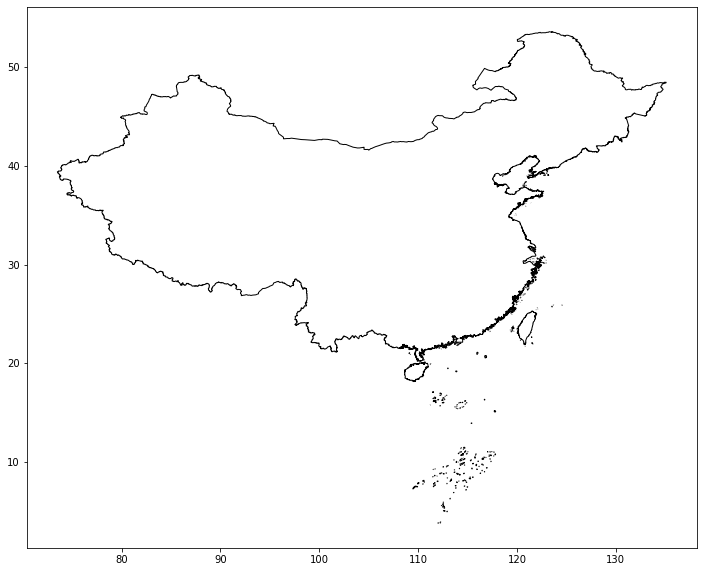

In [3]:
ax = china_country.plot(figsize = (12, 15), color = 'white', edgecolor = 'black')

In [4]:
china_country.crs

## 2/ Open the csv files:

In [5]:
earthquake_china = pd.read_csv('../data/earthquake_china_clean.csv')
earthquake_china.head()

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths,continent,log_deaths
0,1901-02-15 00:00:00,1901,2,15,00:00:00,China,26.0,100.1,0.0,6.5,NaN,0,Asia,-inf
1,1902-07-03 15:36:00,1902,7,3,15:36:00,China,43.2,129.6,20.0,6.7,NaN,0,Asia,-inf
2,1902-08-22 03:00:00,1902,8,22,03:00:00,China,40.0,77.0,0.0,7.7,NaN,5650,Asia,8.639411
3,1904-08-30 11:42:00,1904,8,30,11:42:00,China,30.0,101.0,0.0,6.8,NaN,565,Asia,6.336826
4,1906-12-22 18:21:00,1906,12,22,18:21:00,China,43.5,85.0,0.0,7.2,NaN,285,Asia,5.652489


In [6]:
pop_china = pd.read_csv('../data/china_pop_clean.csv')
pop_china.head()

,city,latitude,longitude,country,population
0,Shanghai,31.222222,121.458056,China,14987000.0
1,Beijing,39.928819,116.388869,China,11106000.0
2,Guangzhou,23.116667,113.250000,China,8829000.0
3,Shenzhen,22.533333,114.133333,China,7581000.0
4,Wuhan,30.583333,114.266667,China,7243000.0


## 3/ Convert the population file as a geofile:

In [7]:
# Need to convert the latitude and longitude as points to be able to match the shp file
china_pop_geo = gpd.GeoDataFrame(pop_china, geometry=gpd.points_from_xy(pop_china.longitude, pop_china.latitude))
china_pop_geo.head(3)

,city,latitude,longitude,country,population,geometry
0,Shanghai,31.222222,121.458056,China,14987000.0,POINT (121.45806 31.22222)
1,Beijing,39.928819,116.388869,China,11106000.0,POINT (116.38887 39.92882)
2,Guangzhou,23.116667,113.250000,China,8829000.0,POINT (113.25000 23.11667)


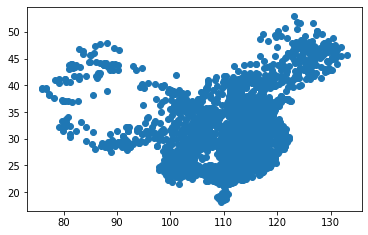

In [8]:
china_pop_geo.plot();

In [9]:
# the file need the center of the shp file to map correctly together
china_pop_geo = gpd.GeoDataFrame(pop_china, 
                           crs = china_country.crs, 
                           geometry = pop_china['geometry'])

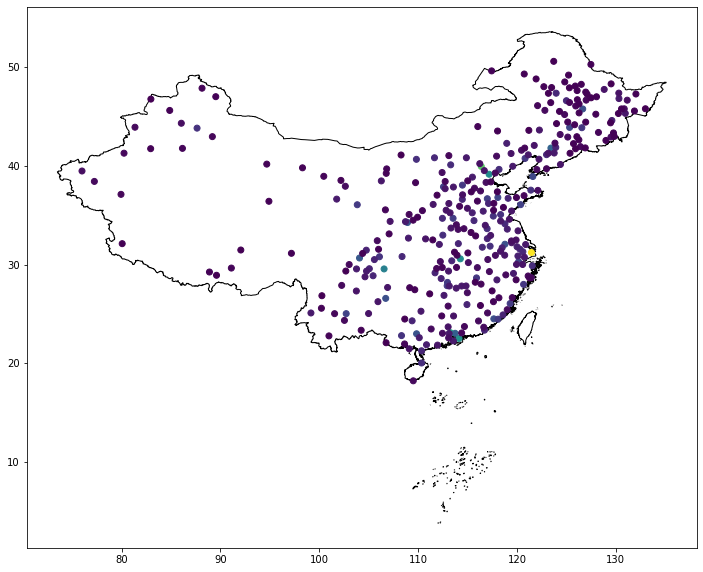

In [10]:
# Testing if the two files match  
ax = china_country.plot(figsize = (12, 12), color = 'white', edgecolor = 'black') #ax is individual plot

china_pop_geo.plot( ax = ax, column = 'population');

## 4/ Convert the earthquake file as a geofile:

In [11]:
china_quake_geo = gpd.GeoDataFrame(
            earthquake_china, geometry=gpd.points_from_xy(earthquake_china.longitude, earthquake_china.latitude))
china_quake_geo.head()

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths,continent,log_deaths,geometry
0,1901-02-15 00:00:00,1901,2,15,00:00:00,China,26.0,100.1,0.0,6.5,NaN,0,Asia,-inf,POINT (100.10000 26.00000)
1,1902-07-03 15:36:00,1902,7,3,15:36:00,China,43.2,129.6,20.0,6.7,NaN,0,Asia,-inf,POINT (129.60000 43.20000)
2,1902-08-22 03:00:00,1902,8,22,03:00:00,China,40.0,77.0,0.0,7.7,NaN,5650,Asia,8.639411,POINT (77.00000 40.00000)
3,1904-08-30 11:42:00,1904,8,30,11:42:00,China,30.0,101.0,0.0,6.8,NaN,565,Asia,6.336826,POINT (101.00000 30.00000)
4,1906-12-22 18:21:00,1906,12,22,18:21:00,China,43.5,85.0,0.0,7.2,NaN,285,Asia,5.652489,POINT (85.00000 43.50000)


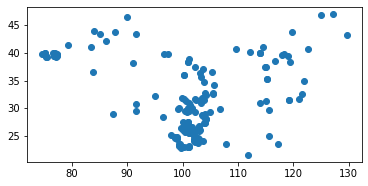

In [12]:
china_quake_geo.plot();

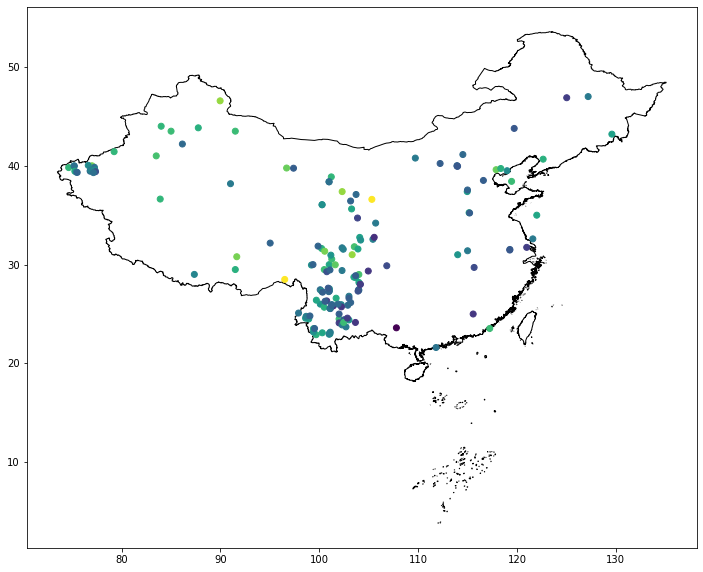

In [13]:
#Test if it works
ax = china_country.plot(figsize = (12, 12), color = 'white', edgecolor = 'black') #ax is individual plot

china_quake_geo.plot( ax = ax, column = 'magnitude');

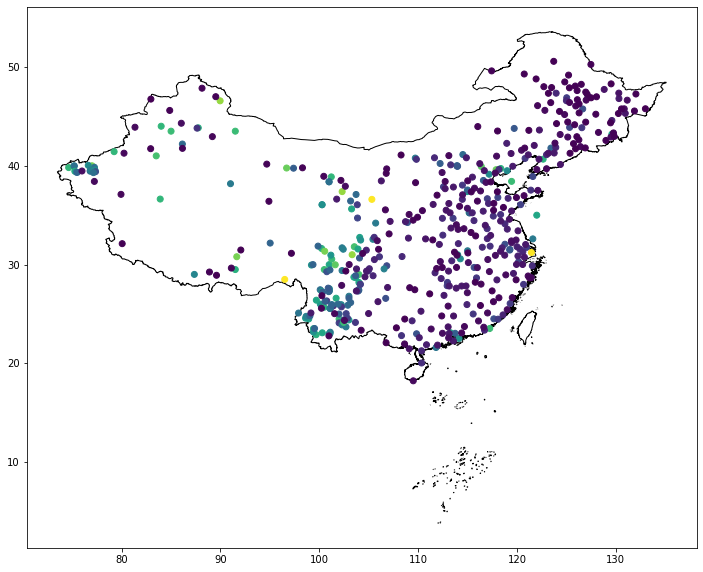

In [14]:
#fig, ax = matplotlib.subplots()
ax = china_country.plot(figsize = (12, 12), color = 'white', edgecolor = 'black') #ax is individual plot

china_quake_geo.plot( ax = ax, column = 'magnitude')
china_pop_geo.plot( ax = ax, column = 'population');

## 5/ Look at population, earthquakes and casualties:

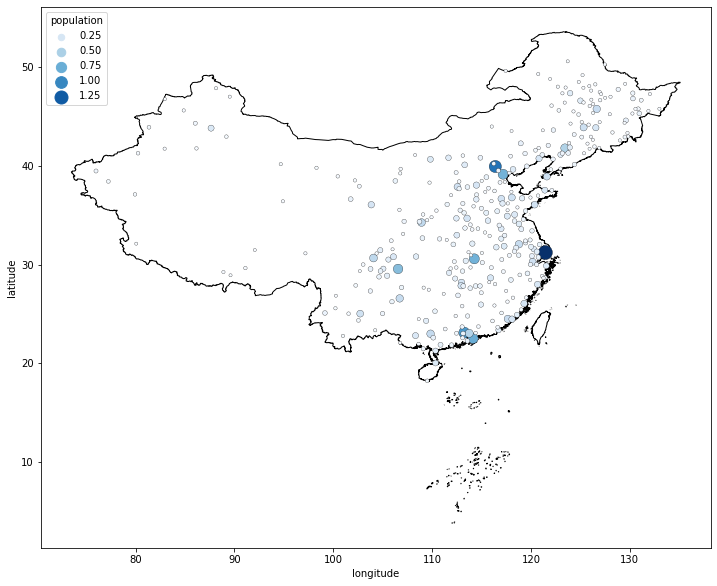

In [15]:
ax = china_country.plot(figsize = (12, 12), color = 'white', edgecolor = 'black')
sns.scatterplot(data=pop_china, x="longitude", y="latitude", hue="population", palette="Blues", size="population", sizes=(10, 200), edgecolor = 'black');

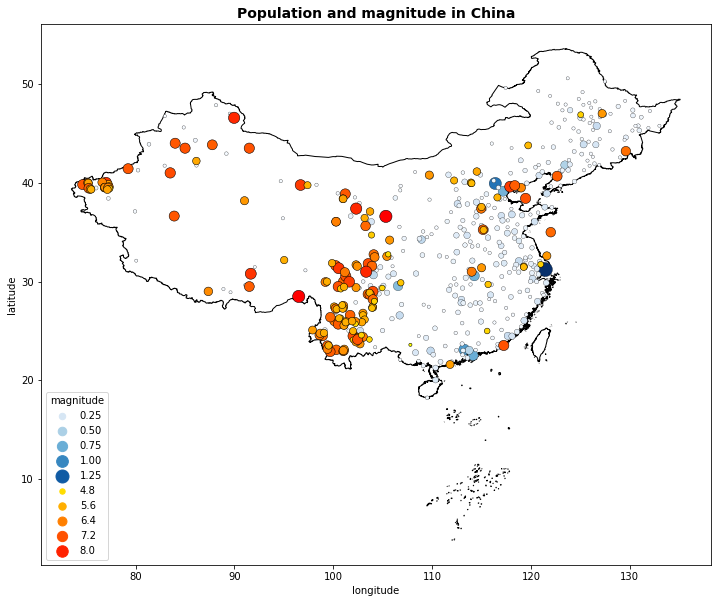

In [17]:
ax = china_country.plot(figsize = (12, 12), color = 'white', edgecolor = 'black')

sns.scatterplot(data=pop_china, x="longitude", y="latitude", hue="population", palette="Blues", size="population", sizes=(10, 200), edgecolor = 'black')

sns.scatterplot(data=earthquake_china, x="longitude", y="latitude", hue="magnitude",palette="autumn_r", size="magnitude", sizes=(10, 150), edgecolor = 'black')
plt.title('Population and magnitude in China', fontsize = 14, fontweight = 'bold');

Earthquakes in china are mainly happening in the middle of the country. The majority of the population is located in East. Some earthquakes of magnitude > to 7 can happen in densely populated area.

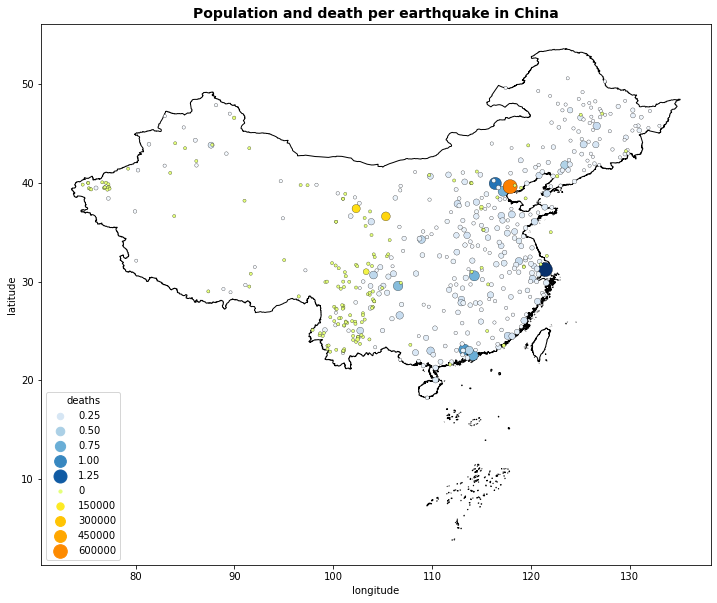

In [18]:
ax = china_country.plot(figsize = (12, 12), color = 'white', edgecolor = 'black')

sns.scatterplot(data=pop_china, x="longitude", y="latitude", hue="population", palette="Blues", size="population", sizes=(10, 200), edgecolor = 'black')

sns.scatterplot(data=earthquake_china, x="longitude", y="latitude", hue="deaths",palette="Wistia", size="deaths", sizes=(10, 200), edgecolor = 'black')
plt.title('Population and death per earthquake in China', fontsize = 14, fontweight = 'bold');

For the number of casualties, the major event happened near Bejing and more than 600,000 people died.

As a conclusion: more dense the population more risk of higher number of death in case of a earthquake near a big city.